# Example with Random Forest
-  From [Video](https://www.youtube.com/watch?v=6O4kASc-SDE&index=12&list=PLGVZCDnMOq0pAwbVAb1kUN3lV7ukhLL2k&t=0s)
-  Repo [NathanEpstein](https://github.com/NathanEpstein/pydata-london)

Bagging Procedure: For some number of trees, T and predetermined depth D, select a random subset of the data (convention is roughly 2/3 with replacement)
Train a decision tree of that data using a subset of the available features (roughly sqrt(M) by convention, where M is the total number of features)

Each tree is 'weaker' as it is trained only on a subset of the information, averaging the predictions enables a strongly predictive resulting model to emerge. Makes them robust to data issues (non-linear /non monotonic functions, un-scaled data, data with missing values, data with poorly chosen features)

Makes them excellent "out of box" tool for general Machine learning problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)


def yfromx(x):
    y = x*np.sin(x)+np.random.uniform()
    return y

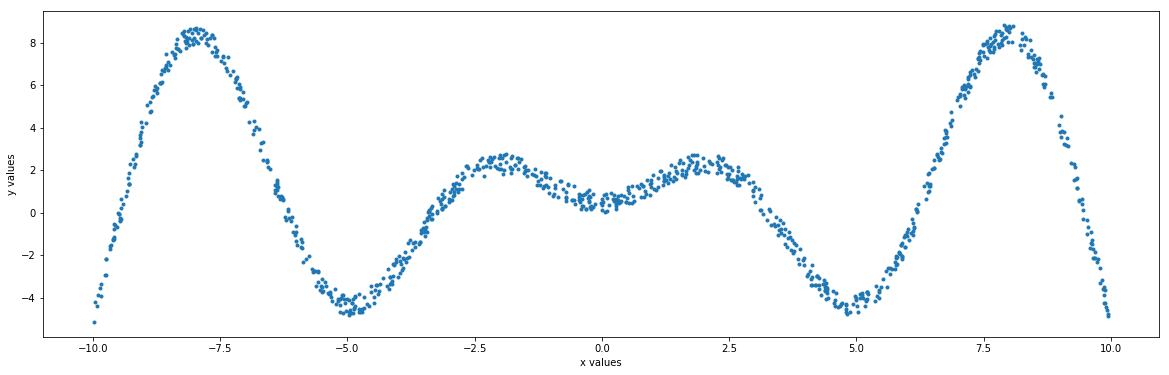

In [2]:
X = np.random.uniform(-10,10,1000)
Y = [yfromx(x) for x in X]
_ = plt.plot(X, Y, marker='.', linestyle='none')
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
plt.show()

In [3]:
# code from lecture/video
from sklearn.ensemble import RandomForestRegressor
import math

def generate_data():
    X, Y = [], []
    f = lambda x : x * math.sin(x) + np.random.uniform()
    for x in np.arange(-10,10,0.05):
        X.append([x])
        Y.append(f(x))
    return (X, Y)

X, Y = generate_data()
model = RandomForestRegressor()
model = model.fit(X, Y)

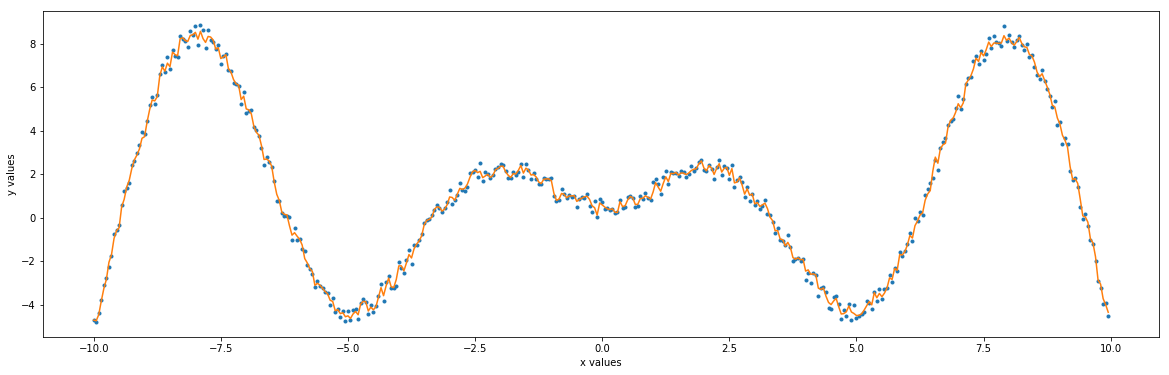

In [4]:
_ = plt.plot(X, Y, marker='.', linestyle='none')
_ = plt.plot(X, model.predict(X))
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
plt.show()

## Next example - Unscaled Features
Seek to classify points as being within four quadrants: 'NE', 'NW', 'SE' and 'SW'

The wrinkle is that our s values will range from (-0.1, 1) and our y from (-5000, 5000)

In [11]:
from sklearn.ensemble import RandomForestClassifier

def quadrant(coords):
    EW = 'W' if coords[0] < 0 else 'E'
    NS = 'S' if coords[1] < 0 else 'N'
    return NS + EW

N = 5000
x = -0.1 + np.random.sample(N) * 1.1
y = -5000 + np.random.sample(N) * 10000

xy_coords = list(zip(x, y))
quad = list(map(quadrant, xy_coords))

model = RandomForestClassifier()
model = model.fit(xy_coords, quad)

In [12]:
model.predict(xy_coords)

array(['SE', 'SE', 'SE', ..., 'SE', 'NE', 'NW'], dtype='<U2')

In [13]:
N = 2000
x_test = -0.1 + np.random.sample(N) * 1.1
y_test = -5000 + np.random.sample(N) * 10000

xy_coords_test = list(zip(x_test, y_test))
quad_test = list(map(quadrant, xy_coords_test))

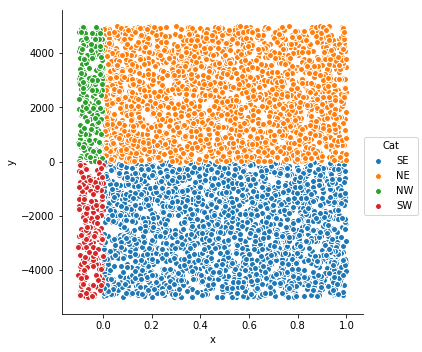

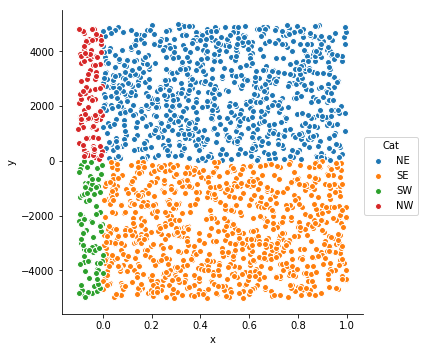

In [14]:
import seaborn as sns
import pandas as pd

# Train data
df = pd.DataFrame({'x':x, 'y':y, 'Cat':quad})
# Using test data and the model to predict
df2 = pd.DataFrame({'x':x_test, 'y':y_test, 'Cat':model.predict(xy_coords_test)})

# Plot
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df, hue="Cat", size=5)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df2, hue="Cat", size=5)
plt.show()

## Trying K nearest neighbors out of the box

not so good results - misses the E/W - SVN will give similar results.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model = model.fit(xy_coords, quad)

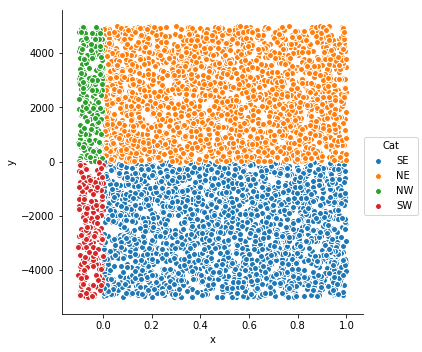

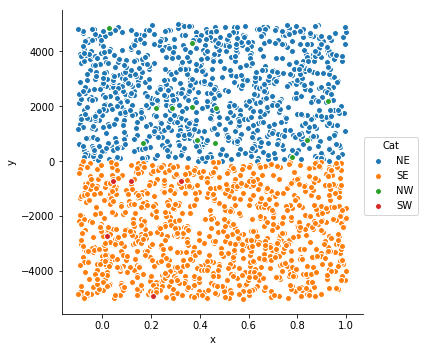

In [20]:
import seaborn as sns
import pandas as pd

# Train data
df = pd.DataFrame({'x':x, 'y':y, 'Cat':quad})
# Using test data and the model to predict
df2 = pd.DataFrame({'x':x_test, 'y':y_test, 'Cat':model.predict(xy_coords_test)})

# Plot
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df, hue="Cat", size=5)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df2, hue="Cat", size=5)
plt.show()

# Neural nets
Parameter tuning is more understandable and intuitive where as structuring and turning a network is more of a black box.

MLlib included in Apache Spark - very easy to deploy and parallelize.
-  Repo [NathanEpstein](https://github.com/NathanEpstein/pydata-london)